In [1]:
#load the library
import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
#Preparing dataset for preprocessing
lending_data=pd.read_csv("/Users/majia/Desktop/Lending_Club_Data.csv")
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
lending_data.shape

(922233, 52)

In [3]:
lending_data.head(10)

,loan_status,recoveries,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,loan_amnt,term,int_rate,sub_grade,installment,issue_d,annual_inc,emp_length,emp_title,dti,verification_status,purpose,home_ownership,addr_state,zip_code,avg_cur_bal,delinq_2yrs,delinq_amnt,earliest_cr_line,inq_last_6mths,open_acc,open_il_12m,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,revol_bal_joint,annual_inc_joint,dti_joint,verification_status_joint,dti_joint.1,loan_id
0,Fully Paid,0.00,37506.41,3506.41,0.00,34000.00,34000.00,60 months,16.29%,D1,832.07,Apr-2016,104000.00,2 years,Manager,34.99,Verified,debt_consolidation,MORTGAGE,WA,980xx,41257.00,1.00,0.00,Feb-2004,0.00,14.00,1.00,0.00,4.00,5.00,15.00,6.00,7.00,0.00,100.00,0.00,0.00,17056.00,88.1%,0.00,577599.00,623324.00,31.00,175141.00,14300.00,NaN,NaN,NaN,NaN,NaN,67296
1,Charged Off,0.00,4666.10,2201.09,0.00,2465.01,20000.00,60 months,13.67%,C3,461.96,Apr-2016,50000.00,2 years,warehouse/const,25.97,Verified,debt_consolidation,MORTGAGE,MN,554xx,12350.00,3.00,0.00,Jun-1984,0.00,11.00,1.00,4.00,5.00,9.00,10.00,9.00,16.00,1.00,66.70,0.00,0.00,10691.00,73.2%,0.00,135850.00,344611.00,31.00,30591.00,12900.00,NaN,NaN,NaN,NaN,NaN,74224
2,Charged Off,0.00,14957.72,7187.68,0.00,7770.04,15000.00,60 months,19.53%,D5,393.50,Apr-2016,70000.00,1 year,Sales,9.45,Not Verified,debt_consolidation,RENT,IL,607xx,3270.00,0.00,0.00,Apr-1993,0.00,4.00,0.00,0.00,2.00,2.00,2.00,4.00,4.00,0.00,100.00,0.00,0.00,13078.00,97.6%,0.00,13078.00,13400.00,7.00,13078.00,11400.00,NaN,NaN,NaN,NaN,NaN,74225
3,Charged Off,3880.00,7963.99,1076.24,0.00,3007.75,11200.00,36 months,11.99%,C1,371.95,Apr-2016,82000.00,10+ years,ASSISTANT OFFICE MANAGER,21.15,Source Verified,debt_consolidation,RENT,NY,104xx,4870.00,0.00,0.00,Apr-2005,4.00,19.00,1.00,0.00,3.00,3.00,16.00,8.00,9.00,0.00,66.70,1.00,1.00,6222.00,54.1%,0.00,92534.00,93072.00,25.00,92534.00,7900.00,NaN,NaN,NaN,NaN,NaN,74232
4,Charged Off,1487.00,17697.80,2780.36,0.00,13430.44,16575.00,36 months,10.75%,B4,540.69,Apr-2016,43680.00,< 1 year,Operations,10.63,Not Verified,debt_consolidation,RENT,CO,804xx,1986.00,1.00,0.00,Apr-1990,0.00,9.00,0.00,0.00,4.00,11.00,2.00,9.00,13.00,1.00,0.00,0.00,0.00,15888.00,19.3%,0.00,15888.00,82300.00,15.00,15888.00,59300.00,NaN,NaN,NaN,NaN,NaN,74237
5,Charged Off,2283.63,29206.02,12853.47,0.00,14068.92,30000.00,60 months,18.99%,D4,778.06,Apr-2016,60000.00,6 years,Active Duty,6.04,Verified,other,MORTGAGE,HI,968xx,1947.00,0.00,0.00,Mar-2008,0.00,5.00,0.00,0.00,2.00,5.00,1.00,4.00,8.00,0.00,0.00,0.00,0.00,5930.00,30.3%,0.00,9734.00,28460.00,9.00,9734.00,18800.00,NaN,NaN,NaN,NaN,NaN,74241
6,Charged Off,1265.59,6147.91,1858.60,0.00,3023.72,15000.00,36 months,18.25%,D3,544.17,Apr-2016,85000.00,NaN,NaN,30.54,Not Verified,small_business,RENT,CA,919xx,7794.00,2.00,0.00,Sep-2010,0.00,15.00,1.00,0.00,3.00,4.00,9.00,10.00,13.00,0.00,0.00,0.00,0.00,5805.00,38.4%,0.00,93526.00,128866.00,23.00,93526.00,5400.00,NaN,NaN,NaN,NaN,NaN,74256
7,Charged Off,6039.00,11907.06,725.21,0.00,5142.85,15000.00,36 months,5.32%,A1,451.73,Apr-2016,75000.00,10+ years,Owner,14.98,Not Verified,credit_card,OWN,NE,681xx,9660.00,0.00,0.00,Feb-2001,0.00,12.00,1.00,0.00,4.00,9.00,8.00,5.00,14.00,0.00,25.00,0.00,0.00,14170.00,51.7%,0.00,115925.00,132680.00,24.00,115925.00,22100.00,NaN,NaN,NaN,NaN,NaN,74261
8,Charged Off,0.00,3748.82,1976.99,0.00,1771.83,10025.00,36 months,28.67%,G4,418.31,Apr-2016,66000.00,< 1 year,owner,14.67,Not Verified,small_business,RENT,CA,926xx,10139.00,0.00,0.00,Jul-2004,3.00,4.00,2.00,0.00,1.00,6.00,3.00,2.00,6.00,0.00,50.00,0.00,0.00,5443.00,65.6%,0.00,40554.00,47025.00,9.00,40554.00,8300.00,NaN,NaN,NaN,NaN,NaN,74262
9,Charged Off,0.00,1285.56,451.22,0.00,834.34,3000.00,36 months,17.27%,D2,107.37,Apr-2016,23000.00,3 years,Warehouse Associate,20.62,Verified,r

In [4]:
lending_data.describe()

,recoveries,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,loan_amnt,installment,annual_inc,dti,avg_cur_bal,delinq_2yrs,delinq_amnt,inq_last_6mths,open_acc,open_il_12m,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,revol_bal_joint,annual_inc_joint,dti_joint,dti_joint.1,loan_id
count,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,920951.00,922183.00,922233.00,922233.00,922232.00,922233.00,922197.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,910673.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,76515.00,83481.00,83480.00,83480.00,922233.00
mean,493.20,14687.14,2496.47,2.70,11694.78,15200.70,457.48,79823.51,19.61,13435.80,0.29,12.28,0.53,11.71,0.73,0.51,3.66,7.36,8.57,8.27,13.46,0.08,36.79,0.19,0.14,16187.26,0.04,142770.14,181060.00,23.64,52543.80,24819.36,34615.67,125739.34,19.40,19.40,58893.34
std,1489.21,11091.29,2679.62,16.96,9656.51,9687.09,286.99,140606.32,18.01,16591.36,0.86,763.68,0.82,5.88,0.96,1.42,2.40,4.61,7.53,4.88,8.04,0.49,35.65,0.54,0.37,22504.92,0.34,163066.81,184314.23,12.22,52023.37,24569.51,29731.16,75518.27,7.95,7.95,35086.89
min,0.00,0.00,0.00,-0.00,0.00,1000.00,7.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,5693.51,0.00,0.00,0.00
25%,0.00,6218.48,769.12,0.00,4200.00,8000.00,246.99,47000.00,12.06,3003.00,0.00,0.00,0.00,8.00,0.00,0.00,2.00,4.00,3.00,5.00,8.00,0.00,0.00,0.00,0.00,5526.00,0.00,28433.00,51872.00,15.00,20870.00,8900.00,15230.50,84000.00,13.55,13.55,28711.00
50%,0.00,11519.60,1605.37,0.00,9500.00,12500.00,378.20,66000.00,18.23,7057.00,0.00,0.00,0.00,11.00,0.00,0.00,3.00,6.00,7.00,7.00,12.00,0.00,30.00,0.00,0.00,10791.00,0.00,75814.00,113918.00,22.00,38640.00,17500.00,27103.00,111700.00,19.02,19.02,58098.00
75%,0.00,20329.51,3266.28,0.00,16000.00,20000.00,617.24,95000.00,25.22,18564.00,0.00,0.00,1.00,15.00,1.00,0.00,5.00,10.00,11.00,11.00,17.00,0.00,66.70,0.00,0.00,19538.00,0.00,214563.00,261939.00,30.00,66692.00,32400.00,45156.50,150000.00,24.88,24.88,87290.00
max,41803.25,73711.26,34776.24,1309.98,40000.01,40000.00,1719.83,110000000.00,999.00,646339.00,36.00,249925.00,5.00,94.00,25.00,38.00,50.00,86.00,159.00,91.00,151.00,36.00,100.00,61.00,8.00,2559552.00,61.00,4404194.00,9999999.00,176.00,3408095.00,1569000.00,1110019.00,7874821.00,69.49,69.49,143033.00


In [5]:
#assign 0 (good) to fully paid loans and 1 (bad) to the rest
lending_data['default'] = np.where((lending_data.loan_status == 'Fully Paid'), 0, 1)
lending_data.drop('loan_status', axis=1, inplace=True)
default = lending_data.default
lending_data = lending_data.drop('default',axis=1)
lending_data.insert(0,'default',default)
lending_data.head(10)

,default,recoveries,total_pymnt,total_rec_int,total_rec_late_fee,total_rec_prncp,loan_amnt,term,int_rate,sub_grade,installment,issue_d,annual_inc,emp_length,emp_title,dti,verification_status,purpose,home_ownership,addr_state,zip_code,avg_cur_bal,delinq_2yrs,delinq_amnt,earliest_cr_line,inq_last_6mths,open_acc,open_il_12m,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,revol_bal_joint,annual_inc_joint,dti_joint,verification_status_joint,dti_joint.1,loan_id
0,0,0.00,37506.41,3506.41,0.00,34000.00,34000.00,60 months,16.29%,D1,832.07,Apr-2016,104000.00,2 years,Manager,34.99,Verified,debt_consolidation,MORTGAGE,WA,980xx,41257.00,1.00,0.00,Feb-2004,0.00,14.00,1.00,0.00,4.00,5.00,15.00,6.00,7.00,0.00,100.00,0.00,0.00,17056.00,88.1%,0.00,577599.00,623324.00,31.00,175141.00,14300.00,NaN,NaN,NaN,NaN,NaN,67296
1,1,0.00,4666.10,2201.09,0.00,2465.01,20000.00,60 months,13.67%,C3,461.96,Apr-2016,50000.00,2 years,warehouse/const,25.97,Verified,debt_consolidation,MORTGAGE,MN,554xx,12350.00,3.00,0.00,Jun-1984,0.00,11.00,1.00,4.00,5.00,9.00,10.00,9.00,16.00,1.00,66.70,0.00,0.00,10691.00,73.2%,0.00,135850.00,344611.00,31.00,30591.00,12900.00,NaN,NaN,NaN,NaN,NaN,74224
2,1,0.00,14957.72,7187.68,0.00,7770.04,15000.00,60 months,19.53%,D5,393.50,Apr-2016,70000.00,1 year,Sales,9.45,Not Verified,debt_consolidation,RENT,IL,607xx,3270.00,0.00,0.00,Apr-1993,0.00,4.00,0.00,0.00,2.00,2.00,2.00,4.00,4.00,0.00,100.00,0.00,0.00,13078.00,97.6%,0.00,13078.00,13400.00,7.00,13078.00,11400.00,NaN,NaN,NaN,NaN,NaN,74225
3,1,3880.00,7963.99,1076.24,0.00,3007.75,11200.00,36 months,11.99%,C1,371.95,Apr-2016,82000.00,10+ years,ASSISTANT OFFICE MANAGER,21.15,Source Verified,debt_consolidation,RENT,NY,104xx,4870.00,0.00,0.00,Apr-2005,4.00,19.00,1.00,0.00,3.00,3.00,16.00,8.00,9.00,0.00,66.70,1.00,1.00,6222.00,54.1%,0.00,92534.00,93072.00,25.00,92534.00,7900.00,NaN,NaN,NaN,NaN,NaN,74232
4,1,1487.00,17697.80,2780.36,0.00,13430.44,16575.00,36 months,10.75%,B4,540.69,Apr-2016,43680.00,< 1 year,Operations,10.63,Not Verified,debt_consolidation,RENT,CO,804xx,1986.00,1.00,0.00,Apr-1990,0.00,9.00,0.00,0.00,4.00,11.00,2.00,9.00,13.00,1.00,0.00,0.00,0.00,15888.00,19.3%,0.00,15888.00,82300.00,15.00,15888.00,59300.00,NaN,NaN,NaN,NaN,NaN,74237
5,1,2283.63,29206.02,12853.47,0.00,14068.92,30000.00,60 months,18.99%,D4,778.06,Apr-2016,60000.00,6 years,Active Duty,6.04,Verified,other,MORTGAGE,HI,968xx,1947.00,0.00,0.00,Mar-2008,0.00,5.00,0.00,0.00,2.00,5.00,1.00,4.00,8.00,0.00,0.00,0.00,0.00,5930.00,30.3%,0.00,9734.00,28460.00,9.00,9734.00,18800.00,NaN,NaN,NaN,NaN,NaN,74241
6,1,1265.59,6147.91,1858.60,0.00,3023.72,15000.00,36 months,18.25%,D3,544.17,Apr-2016,85000.00,NaN,NaN,30.54,Not Verified,small_business,RENT,CA,919xx,7794.00,2.00,0.00,Sep-2010,0.00,15.00,1.00,0.00,3.00,4.00,9.00,10.00,13.00,0.00,0.00,0.00,0.00,5805.00,38.4%,0.00,93526.00,128866.00,23.00,93526.00,5400.00,NaN,NaN,NaN,NaN,NaN,74256
7,1,6039.00,11907.06,725.21,0.00,5142.85,15000.00,36 months,5.32%,A1,451.73,Apr-2016,75000.00,10+ years,Owner,14.98,Not Verified,credit_card,OWN,NE,681xx,9660.00,0.00,0.00,Feb-2001,0.00,12.00,1.00,0.00,4.00,9.00,8.00,5.00,14.00,0.00,25.00,0.00,0.00,14170.00,51.7%,0.00,115925.00,132680.00,24.00,115925.00,22100.00,NaN,NaN,NaN,NaN,NaN,74261
8,1,0.00,3748.82,1976.99,0.00,1771.83,10025.00,36 months,28.67%,G4,418.31,Apr-2016,66000.00,< 1 year,owner,14.67,Not Verified,small_business,RENT,CA,926xx,10139.00,0.00,0.00,Jul-2004,3.00,4.00,2.00,0.00,1.00,6.00,3.00,2.00,6.00,0.00,50.00,0.00,0.00,5443.00,65.6%,0.00,40554.00,47025.00,9.00,40554.00,8300.00,NaN,NaN,NaN,NaN,NaN,74262
9,1,0.00,1285.56,451.22,0.00,834.34,3000.00,36 months,17.27%,D2,107.37,Apr-2016,23000.00,3 years,Warehouse Associate,20.62,Verified,renewable_energy,RENT,CA,945xx,588.00,0.00,0.00,Mar-2005,1.00,12.00,0.00,0.00,4.00,4.00,2.00,11.00,11.00

In [8]:
#calculate bad loan ratio
pd.value_counts(lending_data.default).to_frame()
print ('Bad Loan Ratio: %.2f%%'  % (lending_data.default.sum()/len(lending_data)*100))

Bad Loan Ratio: 29.36%


In [9]:
'''We will drop the features with the following criteria:
1.More than 50% of the data is missing
2.Romove the data is little related to the defalut result.

We will also address the following:
1.convert strings to numerical values
2.address highly correlated predictors
3.calculate the days since the earlist credit line opened
'''

#calculate the days since the earlist credit line opened and convert it to the month
lending_data['earliest_cr_line_date']=pd.to_datetime(lending_data['earliest_cr_line'],format='%b-%Y')
lending_data['month_since_cr_line']=round(pd.to_numeric((pd.to_datetime("2022-01-01")-lending_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))
lending_data.drop(['earliest_cr_line','earliest_cr_line_date','issue_d'], axis=1, inplace=True)

In [10]:
#Remove columns with little information¶
lending_data.drop(['recoveries','total_pymnt','total_rec_int','total_rec_late_fee','total_rec_prncp','zip_code','loan_id'], axis=1, inplace=True)

#Remove columns with too complex information¶
'''we try to transfer. This issue is due to:
1. Too many job titles in the real world, so this predictor is more like an individual-specific factor instead of a categorical factor.
2. The input format is not uniform. For example, we can see both "manager" and "MANAGER" in this column. We know these two mean the same thing, but computer does not and will produce a dummy variable for each.
'''
lending_data.drop(['emp_title', axis=1, inplace=True)

#Remove replicated rows
lending_data.drop_duplicates(inplace=True)

In [11]:
#Drop features missing too much data
percentage_null = lending_data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(lending_data))
lending_data.drop(percentage_null[percentage_null>0.5].index, axis=1, inplace=True) 
lending_data.head(10)

,default,loan_amnt,term,int_rate,sub_grade,installment,annual_inc,emp_length,dti,verification_status,purpose,home_ownership,addr_state,avg_cur_bal,delinq_2yrs,delinq_amnt,inq_last_6mths,open_acc,open_il_12m,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,month_since_cr_line
0,0,34000.00,60 months,16.29%,D1,832.07,104000.00,2 years,34.99,Verified,debt_consolidation,MORTGAGE,WA,41257.00,1.00,0.00,0.00,14.00,1.00,0.00,4.00,5.00,15.00,6.00,7.00,0.00,100.00,0.00,0.00,17056.00,88.1%,0.00,577599.00,623324.00,31.00,175141.00,14300.00,215.00
1,1,20000.00,60 months,13.67%,C3,461.96,50000.00,2 years,25.97,Verified,debt_consolidation,MORTGAGE,MN,12350.00,3.00,0.00,0.00,11.00,1.00,4.00,5.00,9.00,10.00,9.00,16.00,1.00,66.70,0.00,0.00,10691.00,73.2%,0.00,135850.00,344611.00,31.00,30591.00,12900.00,451.00
2,1,15000.00,60 months,19.53%,D5,393.50,70000.00,1 year,9.45,Not Verified,debt_consolidation,RENT,IL,3270.00,0.00,0.00,0.00,4.00,0.00,0.00,2.00,2.00,2.00,4.00,4.00,0.00,100.00,0.00,0.00,13078.00,97.6%,0.00,13078.00,13400.00,7.00,13078.00,11400.00,345.00
3,1,11200.00,36 months,11.99%,C1,371.95,82000.00,10+ years,21.15,Source Verified,debt_consolidation,RENT,NY,4870.00,0.00,0.00,4.00,19.00,1.00,0.00,3.00,3.00,16.00,8.00,9.00,0.00,66.70,1.00,1.00,6222.00,54.1%,0.00,92534.00,93072.00,25.00,92534.00,7900.00,201.00
4,1,16575.00,36 months,10.75%,B4,540.69,43680.00,< 1 year,10.63,Not Verified,debt_consolidation,RENT,CO,1986.00,1.00,0.00,0.00,9.00,0.00,0.00,4.00,11.00,2.00,9.00,13.00,1.00,0.00,0.00,0.00,15888.00,19.3%,0.00,15888.00,82300.00,15.00,15888.00,59300.00,381.00
5,1,30000.00,60 months,18.99%,D4,778.06,60000.00,6 years,6.04,Verified,other,MORTGAGE,HI,1947.00,0.00,0.00,0.00,5.00,0.00,0.00,2.00,5.00,1.00,4.00,8.00,0.00,0.00,0.00,0.00,5930.00,30.3%,0.00,9734.00,28460.00,9.00,9734.00,18800.00,166.00
6,1,15000.00,36 months,18.25%,D3,544.17,85000.00,NaN,30.54,Not Verified,small_business,RENT,CA,7794.00,2.00,0.00,0.00,15.00,1.00,0.00,3.00,4.00,9.00,10.00,13.00,0.00,0.00,0.00,0.00,5805.00,38.4%,0.00,93526.00,128866.00,23.00,93526.00,5400.00,136.00
7,1,15000.00,36 months,5.32%,A1,451.73,75000.00,10+ years,14.98,Not Verified,credit_card,OWN,NE,9660.00,0.00,0.00,0.00,12.00,1.00,0.00,4.00,9.00,8.00,5.00,14.00,0.00,25.00,0.00,0.00,14170.00,51.7%,0.00,115925.00,132680.00,24.00,115925.00,22100.00,251.00
8,1,10025.00,36 months,28.67%,G4,418.31,66000.00,< 1 year,14.67,Not Verified,small_business,RENT,CA,10139.00,0.00,0.00,3.00,4.00,2.00,0.00,1.00,6.00,3.00,2.00,6.00,0.00,50.00,0.00,0.00,5443.00,65.6%,0.00,40554.00,47025.00,9.00,40554.00,8300.00,210.00
9,1,3000.00,36 months,17.27%,D2,107.37,23000.00,3 years,20.62,Verified,renewable_energy,RENT,CA,588.00,0.00,0.00,1.00,12.00,0.00,0.00,4.00,4.00,2.00,11.00,11.00,0.00,25.00,0.00,0.00,6199.00,65.9%,0.00,7060.00,11149.00,13.00,7060.00,3800.00,202.00


In [12]:
#other data preparation
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922233 entries, 0 to 922232
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   default                922233 non-null  int64  
 1   loan_amnt              922233 non-null  float64
 2   term                   922233 non-null  object 
 3   int_rate               922233 non-null  object 
 4   sub_grade              922233 non-null  object 
 5   installment            922233 non-null  float64
 6   annual_inc             922233 non-null  float64
 7   emp_length             847900 non-null  object 
 8   dti                    920951 non-null  float64
 9   verification_status    922233 non-null  object 
 10  purpose                922233 non-null  object 
 11  home_ownership         922233 non-null  object 
 12  addr_state             922233 non-null  object 
 13  avg_cur_bal            922183 non-null  float64
 14  delinq_2yrs            922233 non-nu

In [13]:
# extract numbers from emp_length and fill missing values with the median
lending_data.value_counts(lending_data.emp_length).to_frame()
emp_len={'n/a':0,'< 1 year':1,'1 year':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11}
lending_data.emp_length.replace(emp_len,inplace=True)
lending_data.emp_length=lending_data.emp_length.replace(np.nan,0)
lending_data['emp_length'] = lending_data['emp_length'].fillna(lending_data.emp_length.median())
lending_data.emp_length.unique()

# strip months from 'term' and make it an int
lending_data.term= lending_data.term.astype(str)
lending_data['term'] = lending_data['term'].str.replace(' months', '')
lending_data['term'] = lending_data.term.astype(float)

#interest rate is a string. Remove % and make it a float
lending_data.int_rate= lending_data.int_rate.astype(str)
lending_data['int_rate'] = lending_data['int_rate'].str.strip('%')
lending_data['int_rate'] = lending_data.int_rate.astype(float)

#Revolving line utilization rate is a string. Remove % and make it a float
lending_data.revol_util= lending_data.revol_util.astype(str)
lending_data['revol_util'] = lending_data['revol_util'].str.strip('%')
lending_data['revol_util'] = lending_data.int_rate.astype(float)/100

lending_data.head(5)

,default,loan_amnt,term,int_rate,sub_grade,installment,annual_inc,emp_length,dti,verification_status,purpose,home_ownership,addr_state,avg_cur_bal,delinq_2yrs,delinq_amnt,inq_last_6mths,open_acc,open_il_12m,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,month_since_cr_line
0,0,34000.00,60.00,16.29,D1,832.07,104000.00,3.00,34.99,Verified,debt_consolidation,MORTGAGE,WA,41257.00,1.00,0.00,0.00,14.00,1.00,0.00,4.00,5.00,15.00,6.00,7.00,0.00,100.00,0.00,0.00,17056.00,0.16,0.00,577599.00,623324.00,31.00,175141.00,14300.00,215.00
1,1,20000.00,60.00,13.67,C3,461.96,50000.00,3.00,25.97,Verified,debt_consolidation,MORTGAGE,MN,12350.00,3.00,0.00,0.00,11.00,1.00,4.00,5.00,9.00,10.00,9.00,16.00,1.00,66.70,0.00,0.00,10691.00,0.14,0.00,135850.00,344611.00,31.00,30591.00,12900.00,451.00
2,1,15000.00,60.00,19.53,D5,393.50,70000.00,2.00,9.45,Not Verified,debt_consolidation,RENT,IL,3270.00,0.00,0.00,0.00,4.00,0.00,0.00,2.00,2.00,2.00,4.00,4.00,0.00,100.00,0.00,0.00,13078.00,0.20,0.00,13078.00,13400.00,7.00,13078.00,11400.00,345.00
3,1,11200.00,36.00,11.99,C1,371.95,82000.00,11.00,21.15,Source Verified,debt_consolidation,RENT,NY,4870.00,0.00,0.00,4.00,19.00,1.00,0.00,3.00,3.00,16.00,8.00,9.00,0.00,66.70,1.00,1.00,6222.00,0.12,0.00,92534.00,93072.00,25.00,92534.00,7900.00,201.00
4,1,16575.00,36.00,10.75,B4,540.69,43680.00,1.00,10.63,Not Verified,debt_consolidation,RENT,CO,1986.00,1.00,0.00,0.00,9.00,0.00,0.00,4.00,11.00,2.00,9.00,13.00,1.00,0.00,0.00,0.00,15888.00,0.11,0.00,15888.00,82300.00,15.00,15888.00,59300.00,381.00


<AxesSubplot:>

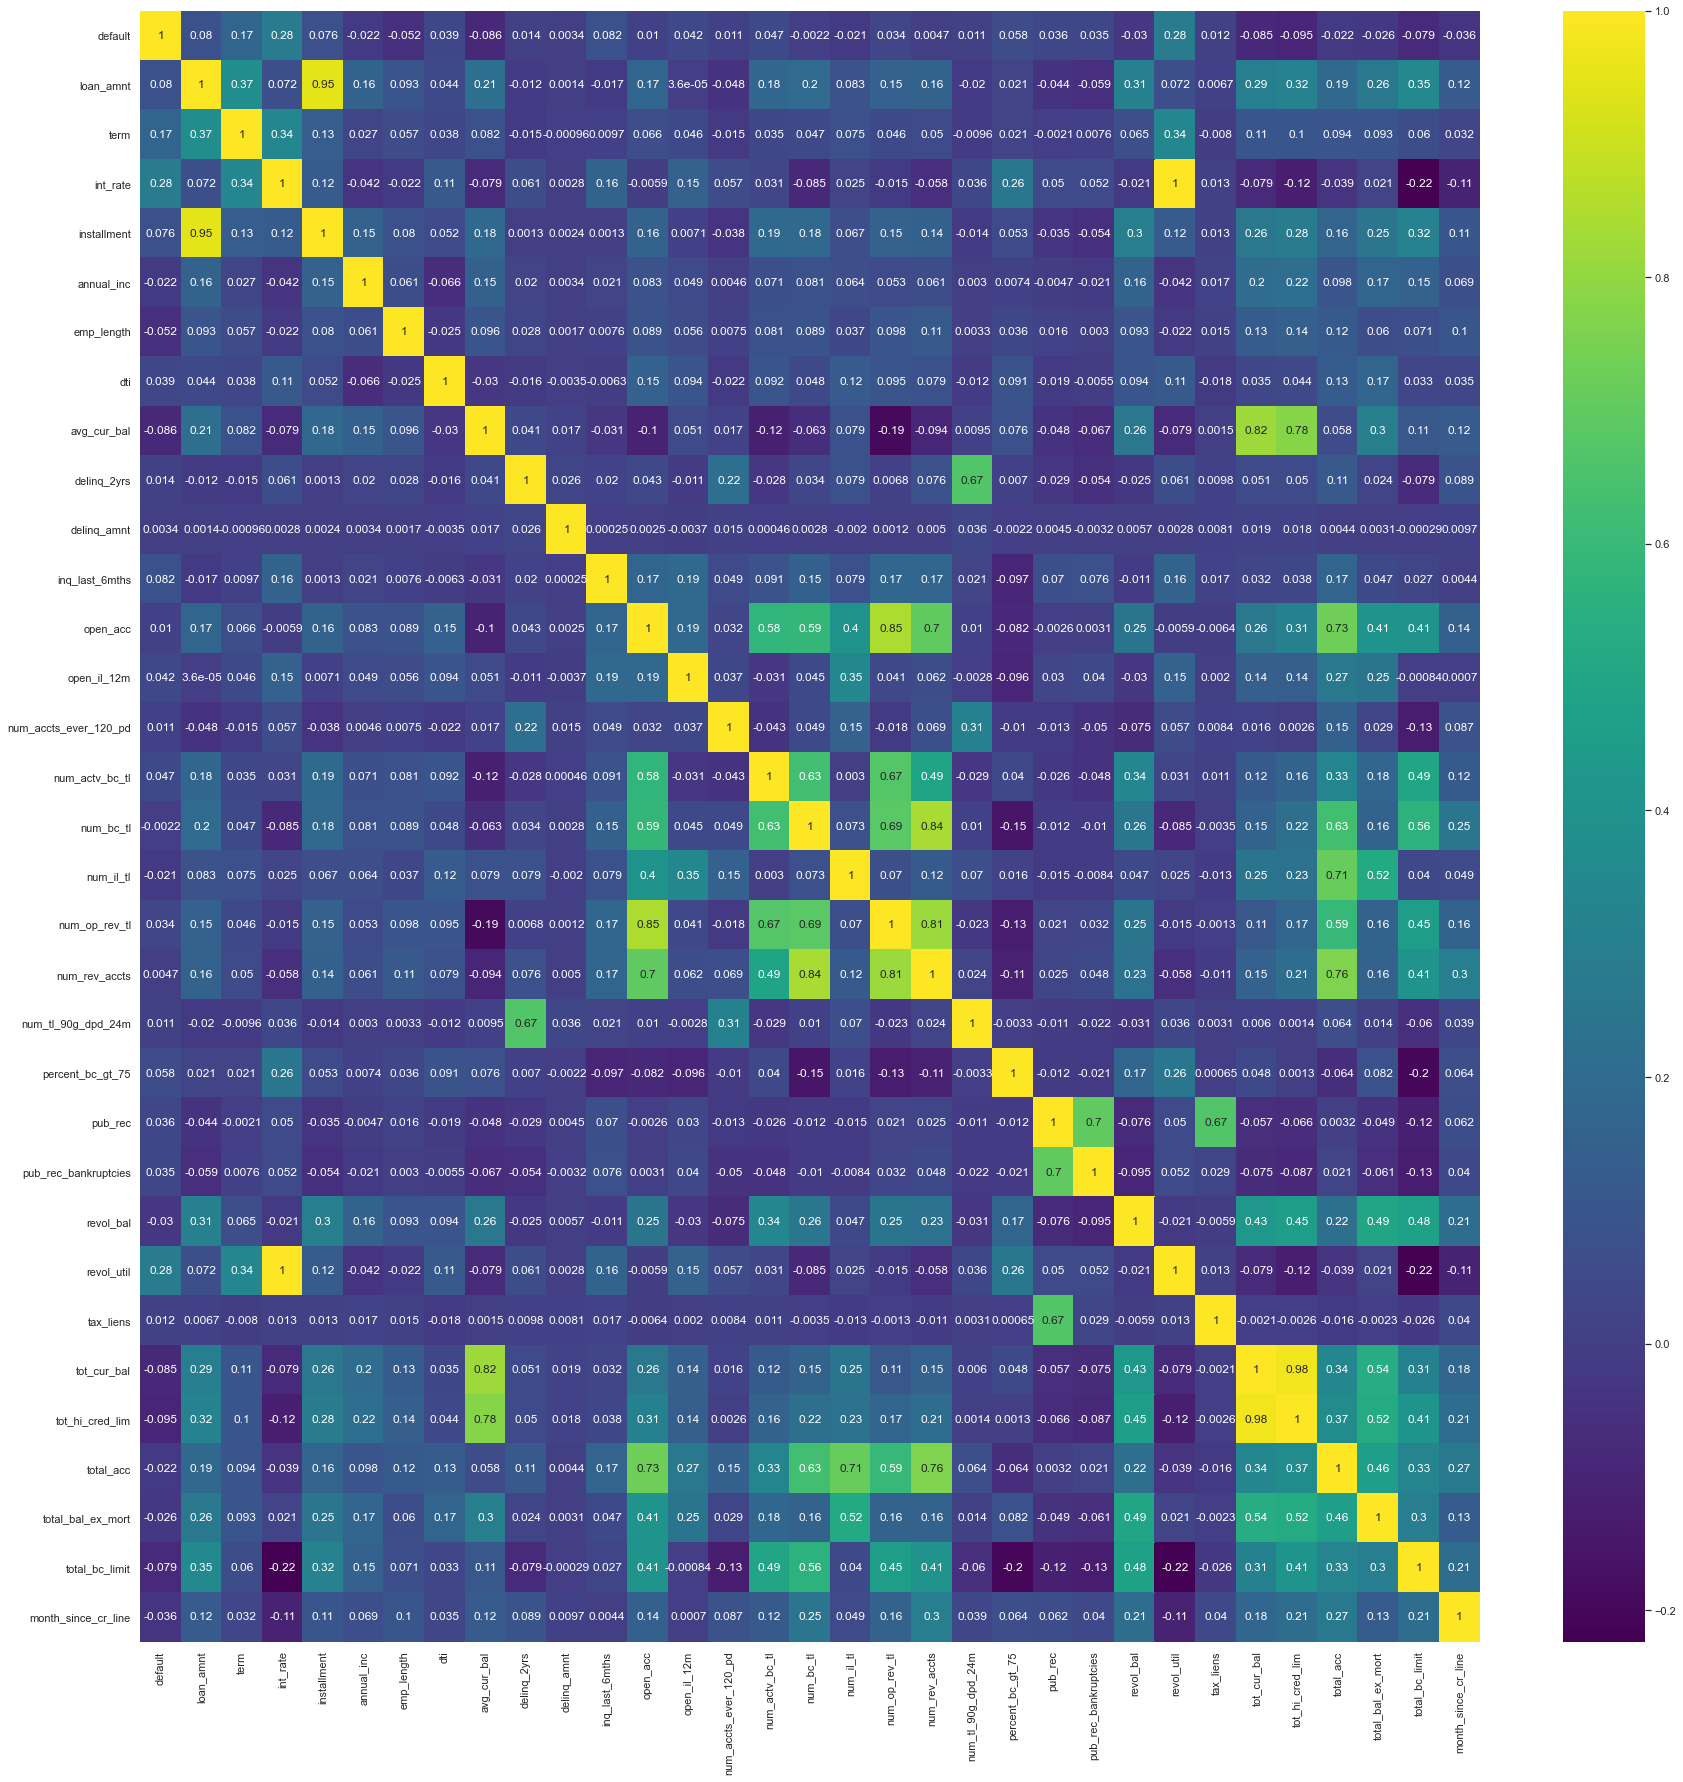

In [14]:
#explore covariancne for variables
from numpy import random
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

plt.figure(figsize=(30,30))
sns.heatmap(lending_data.corr(), annot=True, cmap='viridis')

In [16]:
#drop highly correlated predictors
lending_data.drop(['revol_util','tot_hi_cred_lim'], axis=1, inplace=True)

#find outliers
q1 = lending_data.quantile(0.25)
q3 = lending_data.quantile(0.75)
iqr = q3-q1
((lending_data < (q1 - 1.5 * iqr)) | (lending_data > (q3 + 1.5 * iqr))).sum()

<ipython-input-16-7e8a09e9e962>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((lending_data < (q1 - 1.5 * iqr)) | (lending_data > (q3 + 1.5 * iqr))).sum()
<ipython-input-16-7e8a09e9e962>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((lending_data < (q1 - 1.5 * iqr)) | (lending_data > (q3 + 1.5 * iqr))).sum()


addr_state                    0
annual_inc                46888
avg_cur_bal               51861
default                       0
delinq_2yrs              163995
delinq_amnt                2468
dti                       14324
emp_length                    0
home_ownership                0
inq_last_6mths            29908
installment               26950
int_rate                  23579
loan_amnt                 25241
month_since_cr_line       31789
num_accts_ever_120_pd    211062
num_actv_bc_tl            24080
num_bc_tl                 19638
num_il_tl                 44799
num_op_rev_tl             22870
num_rev_accts             35684
num_tl_90g_dpd_24m        46023
open_acc                  26462
open_il_12m               49035
percent_bc_gt_75              0
pub_rec                  147591
pub_rec_bankruptcies     119722
purpose                       0
revol_bal                 59766
sub_grade                     0
tax_liens                 22077
term                          0
tot_cur_

In [17]:
lending_data.describe()

,default,loan_amnt,term,int_rate,installment,annual_inc,emp_length,dti,avg_cur_bal,delinq_2yrs,delinq_amnt,inq_last_6mths,open_acc,open_il_12m,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_cur_bal,total_acc,total_bal_ex_mort,total_bc_limit,month_since_cr_line
count,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,920951.00,922183.00,922233.00,922233.00,922232.00,922233.00,922197.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,910673.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00,922233.00
mean,0.29,15200.70,42.25,13.33,457.48,79823.51,6.22,19.61,13435.80,0.29,12.28,0.53,11.71,0.73,0.51,3.66,7.36,8.57,8.27,13.46,0.08,36.79,0.19,0.14,16187.26,0.04,142770.14,23.64,52543.80,24819.36,243.92
std,0.46,9687.09,10.53,5.24,286.99,140606.32,4.06,18.01,16591.36,0.86,763.68,0.82,5.88,0.96,1.42,2.40,4.61,7.53,4.88,8.04,0.49,35.65,0.54,0.37,22504.92,0.34,163066.81,12.22,52023.37,24569.51,95.01
min,0.00,1000.00,36.00,5.31,7.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,55.00
25%,0.00,8000.00,36.00,9.44,246.99,47000.00,3.00,12.06,3003.00,0.00,0.00,0.00,8.00,0.00,0.00,2.00,4.00,3.00,5.00,8.00,0.00,0.00,0.00,0.00,5526.00,0.00,28433.00,15.00,20870.00,8900.00,183.00
50%,0.00,12500.00,36.00,12.62,378.20,66000.00,6.00,18.23,7057.00,0.00,0.00,0.00,11.00,0.00,0.00,3.00,6.00,7.00,7.00,12.00,0.00,30.00,0.00,0.00,10791.00,0.00,75814.00,22.00,38640.00,17500.00,225.00
75%,1.00,20000.00,60.00,16.12,617.24,95000.00,11.00,25.22,18564.00,0.00,0.00,1.00,15.00,1.00,0.00,5.00,10.00,11.00,11.00,17.00,0.00,66.70,0.00,0.00,19538.00,0.00,214563.00,30.00,66692.00,32400.00,291.00
max,1.00,40000.00,60.00,30.99,1719.83,110000000.00,11.00,999.00,646339.00,36.00,249925.00,5.00,94.00,25.00,38.00,50.00,86.00,159.00,91.00,151.00,36.00,100.00,61.00,8.00,2559552.00,61.00,4404194.00,176.00,3408095.00,1569000.00,1053.00


In [18]:
#translated qualitative/categorical variables into dummy variables
print([column for column in lending_data.columns if lending_data[column].dtype == object])

['sub_grade', 'verification_status', 'purpose', 'home_ownership', 'addr_state']


In [19]:
dummy_variables=[pd.get_dummies(lending_data['addr_state'],prefix='addr_state',prefix_sep=':'),
                pd.get_dummies(lending_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                pd.get_dummies(lending_data['purpose'],prefix='purpose',prefix_sep=':'),
                pd.get_dummies(lending_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                pd.get_dummies(lending_data['sub_grade'],prefix='sub_grade',prefix_sep=':') ]
dummy_variables=pd.concat(dummy_variables, axis= 1)
lending_data=pd.concat([lending_data,dummy_variables],axis= 1)
lending_data.drop(['addr_state','home_ownership','purpose','verification_status','sub_grade'], axis=1, inplace=True)

In [20]:
#drop rows with missing rows
print(lending_data.isnull().any())
lending_data=lending_data.dropna()

default                                False
loan_amnt                              False
term                                   False
int_rate                               False
installment                            False
annual_inc                             False
emp_length                             False
dti                                     True
avg_cur_bal                             True
delinq_2yrs                            False
delinq_amnt                            False
inq_last_6mths                          True
open_acc                               False
open_il_12m                             True
num_accts_ever_120_pd                  False
num_actv_bc_tl                         False
num_bc_tl                              False
num_il_tl                              False
num_op_rev_tl                          False
num_rev_accts                          False
num_tl_90g_dpd_24m                     False
percent_bc_gt_75                        True
pub_rec   

In [21]:
#lending_data.to_csv("/Users/majia/Desktop/Lending_Club_Data2.csv")

In [22]:

lending_data.shape

(909392, 137)

In [23]:
lending_data.head(10)

,default,loan_amnt,term,int_rate,installment,annual_inc,emp_length,dti,avg_cur_bal,delinq_2yrs,delinq_amnt,inq_last_6mths,open_acc,open_il_12m,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_cur_bal,total_acc,total_bal_ex_mort,total_bc_limit,month_since_cr_line,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OWN,home_ownership:RENT,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5
0,0,34000.00,60.00,16.29,832.07,104000.00,3.00,34.99,41257.00,1.00,0.00,0.00,14.00,1.00,0.00,4.00,5.00,15.00,6.00,7.00,0.00,100.00,0.00,0.00,17056.00,0.00,577599.00,31.00,175141.00,14300.00,215.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,20000.00,60.00,13.67,461.96,50000.00,3.00,25.97,12350.00,3.00,0.00,0.00,11.00,1.00,4.00,5.00,9.00,10.00,9.00,16.00,1.00,66.70,0.00,0.00,10691.00,0.00,135850.00,31.00,30591.00,12900.00,451.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,15000.00,60.00,19.53,393.50,70000.00,2.00,9.45,3270.00,0.00,0.00,0.00,4.00,0.00,0.00,2.00,2.00,2.00,4.00,4.00,0.00,100.00,0.00,0.00,13078.00,0.00,13078.00,7.00,13078.00,11400.00,345.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,11200.00,36.00,11.99,371.95,82000.00,11.00,21.15,4870.00,0.00,0.00,4.00,19.00,1.00,0.00,3.00,3.00,16.00,8.00,9.00,0.00,66.70,1.00,1.00,6222.00,0.00,92534.00,25.00,92534.00,7900.00,201.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,16575.00,36.00,10.75,540.69,43680.00,1.00,10.63,1986.00,1.00,0.00,0.00,9.00,0.00,0.00,4.00,11.00,2.00,9.00,13.00,1.00,0.00,0.00,0.00,15888.00,0.00,15888.00,15.00,15888.00,59300.00,381.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
lending_data.to_csv("/Users/majia/Desktop/credit_nunmeric.csv")